## Logistic Regression

#### AI Saturday Lagos Begineers Class (Instructors: `Tejumade Afonja`, `Kenechi Dukor`, `Ifeanyi Igwegbe`)
This exercise is adopted from [Andrew Ng Machine Learning Course](https://www.coursera.org/learn/machine-learning)

In [2]:
# Libraries required for this practice 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Loading Data

The data we will be using is a .txt file which contains information about students who want to gain admission and their exam scores.

The values on the first column contains the Exam 1 score, the values of the second column contains Exam 2 score and values on the third column contains the corresponding success (1) or fail (0).

The goal of this exercise is to use logistic regression and the optimization technique to generate a model that will predcit the probability that a student will gain admission after the two two exam sxores has been supplied.

In [3]:
# Using pandas to view the data
data = pd.read_csv('data/ex2data1.txt', names=['x1','x2','y'])
data.head()

,x1,x2,y
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [4]:
print("We have ", data.shape[0], " training examples")

We have  100  training examples


Previously, we used this method `data = data.values` to convert the pandas dataframe to numpy. Below is another method

In [5]:
# Lets convert values of the pandas dataframe into a numpy array
x_raw = np.asarray(data[["x1","x2"]])
x_raw.shape

(100, 2)

In [6]:
y_raw = np.asarray(data["y"])
y_raw.shape

(100,)

You can also convert the data in to a numpy array without needing to go through pandas. Use the code below

`data = np.loadtxt("ex1data1.txt", delimiter=',')`

### Data Visualization

In [7]:
# This plot function was created, such that it can be used for other problems in this notebook
def plot(x, y, xlabel, ylabel, legend, ax=None):
    # Find Indices of Positive and Negative Examples
    pos = y == 1
    neg = y == 0

    if ax == None:
        # Plot Examples
        plt.xlabel(xlabel) # Exam Score 1
        plt.ylabel(ylabel) # Exam Score 2
        plt.plot(x[pos, 0], x[pos, 1], 'k+', marker='+', c='b')
        plt.plot(x[neg, 0], x[neg, 1], 'ko', c='y')
        plt.legend(legend) #the legend should be an array
    else:
        ax.set_xlabel(xlabel)
        ax.set_ylabel(ylabel)
        ax.plot(x[pos, 0], x[pos, 1], 'k+', marker='+', c='b')
        ax.plot(x[neg, 0], x[neg, 1], 'ko', c='y')
        ax.legend(legend) #,'Admitted', 'Not admitted'


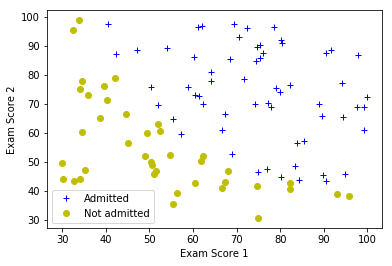

In [8]:
plot(x_raw, y_raw, "Exam Score 1", "Exam Score 2", ['Admitted', 'Not admitted'])

Now lets stack a ones to our input data `X` so that it will cater for the bias (`theta0`)

In [9]:
# add x0 to the feature matrix
X = np.c_[np.ones(x_raw.shape[0]), x_raw]
y = y_raw.reshape(-1,1)

You can also add your ones column this way `X = np.hstack((np.ones((x_raw.shape[0],1)),x_raw))` 

## Implementation

### Sigmoid function

Now, lets implement the sigmoid function that we discussed in class. 
Remember that we modified the hypothesis for logistic regression as follows:

$$h_\theta(x) = g(\theta^Tx)$$

where $g$ is the sigmoid function defined as:
$$g(z) = \frac{1}{1+e^{-z}}$$


In [10]:
def sigmoid(z):
    
    return 1 / (1 + np.exp(-z))

### Cost Function

Now lets implement the cost function that we also discussed in class.

$$ J(\theta) = \frac{1}{m}\sum_{i=1}^{m}\big[-y^{(i)}\, log\,( h_\theta\,(x^{(i)}))-(1-y^{(i)})\,log\,(1-h_\theta(x^{(i)}))\big]$$

where the cost 
- `J = -log(h) when y = 1`
- `J = -log(1 - h) when y = 0`

In [11]:
def compute_cost(initial_theta, x, y):
    
    m = x[:,0].size
    h = sigmoid(x @ initial_theta)
    J = None
    J = 1/m *(-np.log(h).T @ y - np.log(1-h).T @ (1-y))[0]
    
    return J

### Gradient

Unlike in the last two lectures, here we would only define a function that would calculate the gradient of the cost and not the full `update thata` function.
This is because, we will be using an external library that will help us with the theta optimization.

Recall that the gradient of the cost function is given as
 $$ \frac{\delta J(\theta)}{\delta\theta_{j}} = \frac{1}{m}\sum_{i=1}^{m} ( h_\theta (x^{(i)})-y^{(i)})x^{(i)}_{j} $$ 

In [12]:
def gradient(theta, x, y):
    m = x[:,0].size
    h = sigmoid(x @ (theta.reshape(-1,1)))
    
    grad =(1/m)*x.T @ (h-y)

    return(grad.flatten())

Now, lets test our functions with an initialized weight of zeros.

In [13]:
initial_theta = np.zeros(X.shape[1])
cost = compute_cost(initial_theta, X, y)
grad = gradient(initial_theta, X, y)
print('Cost: ', cost)
print('Grad: ', grad)

Cost:  0.6931471805599453
Grad:  [ -0.1        -12.00921659 -11.26284221]


### Training 
#### Advanced Optimization Funtion

Unlike in the previous classes where we wrote an `Update theta` function to find the optimal parameters, here we will be using the `scipy minimize` function to calculate the weights `theta` for this dataset.
the function is defined below

`scipy.optimize.minimize(fun, x0, args=(), method=None, jac=None, hess=None, hessp=None, bounds=None, constraints=(), tol=None, callback=None, options=None)`

In [14]:
# import the minimize function
from scipy.optimize import minimize

In [15]:
# maxiter is the number of iterations
# args is dataset (input and output)
res = minimize(compute_cost, initial_theta, args=(X,y), method=None, jac=gradient, options={'maxiter':400})

C:\Users\Kenechi.Dukor\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  
C:\Users\Kenechi.Dukor\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in matmul
  


In [16]:
res

      fun: 0.2034977015894438
 hess_inv: array([[ 3.31474479e+03, -2.63892205e+01, -2.70237122e+01],
       [-2.63892205e+01,  2.23869433e-01,  2.02682332e-01],
       [-2.70237122e+01,  2.02682332e-01,  2.35335117e-01]])
      jac: array([-9.52476816e-09, -9.31921315e-07, -2.82608926e-07])
  message: 'Optimization terminated successfully.'
     nfev: 31
      nit: 23
     njev: 31
   status: 0
  success: True
        x: array([-25.16133284,   0.2062317 ,   0.2014716 ])

The output of the `minimize` funtion contains information about the training process and the uptimised parameters.
The optimised parameter value is saved with key `x`

In [17]:
# this will return the trained weights
res.x

array([-25.16133284,   0.2062317 ,   0.2014716 ])

### Test

Lets get a sense of how good the model we just trained is at predicting the same training data we used. 

In [18]:
def Test(theta, X, threshold=0.5):
    p = sigmoid(X @ theta.T) >= threshold
    print(p.astype('int'))
    return(p.astype('int'))

In [19]:
p = Test(res.x, X) 
print('Train accuracy {}%'.format(100*sum(p == y.ravel())/p.size))

[0 0 0 1 1 0 1 0 1 1 1 0 1 1 0 1 0 0 1 1 0 1 0 0 1 1 1 1 0 0 1 1 0 0 0 0 1
 1 0 0 1 0 1 1 0 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 0 0 0 0 0 1 0 1 1 0 1 1 1
 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 0 1 1 0 1 1 1 1 1 0 1]
Train accuracy 89.0%


In [20]:
def test_plot(x, y, xlabel, ylabel, legend, input_1, input_2):
    
    plot(x_raw, y_raw, xlabel, ylabel, legend)
    if(input_1 and input_2 == None):
        x1_min, x1_max = x_raw[:,0].min(), x_raw[:,0].max()
        x2_min, x2_max = x_raw[:,1].min(), x_raw[:,1].max()
        xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
        x_test = np.c_[np.ones((xx1.ravel().shape[0],1)), xx1.ravel(), xx2.ravel()]
        h = sigmoid(x_test @ res.x)
        h = h.reshape(xx1.shape)
        plt.contour(xx1, xx2, h, [0.5], linewidths=1, colors='b')
    else:
        
        x1_min, x1_max = x_raw[:,0].min(), x_raw[:,0].max()
        x2_min, x2_max = x_raw[:,1].min(), x_raw[:,1].max()
        xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
        x_test = np.c_[np.ones((xx1.ravel().shape[0],1)), xx1.ravel(), xx2.ravel()]
        h = sigmoid(x_test @ res.x)
        h = h.reshape(xx1.shape)
        plt.contour(xx1, xx2, h, [0.5], linewidths=1, colors='b')
        plt.scatter(input_1, input_2, s=60, c='g', marker='v')

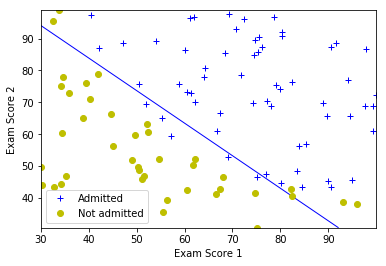

In [21]:
test_plot(x_raw, y_raw, "Exam Score 1", "Exam Score 2", ['Admitted', 'Not admitted'], None, None)

### Predict

**Congratulation** You have successfully trained a classifer

Lets write a predict function that takes in the input features and prdeicts whether a student will gain admission

In [22]:
def predict(trained_weight, x, y):
    input_1 = int(input("Enter Exam 1 Score: "))
    input_2 = int(input("Enter Exam 2 Score: "))

    z = trained_weight[0] + trained_weight[1]*input_1 + trained_weight[2]*input_2
    h = 1 / (1 + np.exp(-z)) #sigmoid

    prob = h
    print('Admission probability is: ', prob, "\n")
    test_plot(x, y, "Exam Score 1", "Exam Score 2", ['Admitted', 'Not admitted'], input_1, input_2)
    
    if (prob >= 0.5):
        print("This student has higher chances of gaining admission")
    else:
        print("This student has lower chances of gaining admission")

Enter Exam 1 Score: 65
Enter Exam 2 Score: 80
Admission probability is:  0.987400961394737 

This student has higher chances of gaining admission


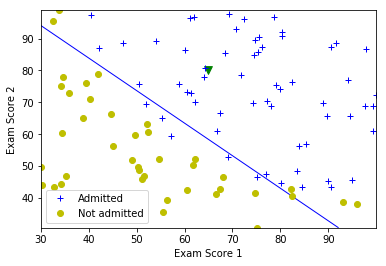

In [24]:
predict(res.x, x_raw, x_raw)

Notice the position of the green marker. it reflects the position of your input on the regression plot

## Regularised Logistic Regression

Here, we are going to understand and implement the idea of regularization.
We will implement regularized logistic regression to predict whether microchips from a fabrication plant passes quality assurance (QA). This will be done from the result of two results from 2 tests.

In [25]:
# Using pandas to view the data
data2 = pd.read_csv('data/ex2data2.txt', names=['x1','x2','y'])
data2.head()

,x1,x2,y
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [26]:
print("We have ", data2.shape[0], " training examples")

We have  118  training examples


Previously, we used this method `data = data.values` to convert the pandas dataframe to numpy. Below is another method

In [27]:
x2_raw = np.asarray(data2[["x1","x2"]])
y2_raw = np.asarray(data2["y"])

### Data Visualization

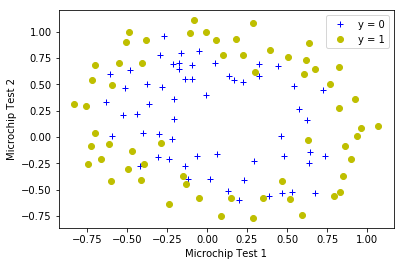

In [28]:
plot(x2_raw, y2_raw, 'Microchip Test 1', 'Microchip Test 2', ['y = 0', 'y = 1'])

#### Extra Feature Generation
Notice that the plot above cannot be classified using an ordinary linear equation (straight line equation). I can only be classified with some kind of circle equation. 

As such, we need a polyonomial equation for such classification.

To do this, we will generate extra features for the training that will increase the equation to `n>2` deg.

ie: 
$$ \theta_0 + x_1\theta_1 + x_2\theta_2 + x_1^2\theta_3 + x_2^2\theta_4 + x_1^n\theta_m + x_2^n\theta_m+_1$$

**Generate polynomial and interaction features.**

To generate the extra features, we will be using an advanced `sklearn` function that returns a new feature matrix consisting of all polynomial combinations of the features with degree less than or equal to the specified degree. For example, if an input sample is two dimensional and of the form [a, b], the degree-2 polynomial features are [1, a, b, a^2, ab, b^2].

`class sklearn.preprocessing.PolynomialFeatures(degree=2, interaction_only=False, include_bias=True)`[source](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)

In [29]:
from sklearn.preprocessing import PolynomialFeatures

In [30]:
# LEts go to the 6th degree
mapping = PolynomialFeatures(6)

In [31]:
mapping

PolynomialFeatures(degree=6, include_bias=True, interaction_only=False)

Next, we pass in our input feature to the `mapping` function to get our new feature to the 6th degree 

In [32]:
x2_raw_mapped = mapping.fit_transform(x2_raw)
x2_raw_mapped.shape

(118, 28)

Notice that we now have 28 input features

### Cost Function

Now lets implement the regularized cost function that we also discussed in class.

$$ J(\theta) = \frac{1}{m}\sum_{i=1}^{m}\big[-y^{(i)}\, log\,( h_\theta\,(x^{(i)}))-(1-y^{(i)})\,log\,(1-h_\theta(x^{(i)}))\big] + \frac{\lambda}{2m}\sum_{j=1}^{n}\theta_{j}^{2}$$

where the cost 
- `J = -log(h) when y = 1`
- `J = -log(1 - h) when y = 0`

In [33]:
def costFunctionReg(theta, X, y, reg):
    m = y.size
    h = sigmoid(X @ theta)
    J = (1/m)*(-(np.log(h).T @ y) - (np.log(1-h).T @ (1-y))) + (reg/(2*m))*np.sum(np.square(theta[1:]))
    #print(J.shape)
    
    return(J)

### Gradient
Here we would only define a function that would calculate the regularized gradient of the cost and not the full `update thata` function.
This is because, we will be using an external library that will help us with the theta optimization.

Recall that the gradient of the regularized cost function is given as:
$$ \frac{\delta J(\theta)}{\delta\theta_{j}} = \frac{1}{m}\sum_{i=1}^{m} ( h_\theta (x^{(i)})-y^{(i)})x^{(i)}_{j} + \frac{\lambda}{m}\theta_{j}$$ 

In [34]:
def gradientReg(theta,X, y, reg):
    m = y.size
    h = sigmoid(X @ theta)
    grad = (1/m)*(X.T @ (h-y)) + (reg/m)*theta  #+ (reg/m)*np.r_[[[0]],theta[1:].reshape(-1,1)]
    
    return (grad.flatten())

Now, lets test our functions with an initialized weight of zeros.

In [35]:
initial_theta = np.zeros(x2_raw_mapped.shape[1])
costFunctionReg(initial_theta, x2_raw_mapped, y2_raw, 1)
gradientReg(initial_theta,x2_raw_mapped, y2_raw, 1)

array([8.47457627e-03, 1.87880932e-02, 7.77711864e-05, 5.03446395e-02,
       1.15013308e-02, 3.76648474e-02, 1.83559872e-02, 7.32393391e-03,
       8.19244468e-03, 2.34764889e-02, 3.93486234e-02, 2.23923907e-03,
       1.28600503e-02, 3.09593720e-03, 3.93028171e-02, 1.99707467e-02,
       4.32983232e-03, 3.38643902e-03, 5.83822078e-03, 4.47629067e-03,
       3.10079849e-02, 3.10312442e-02, 1.09740238e-03, 6.31570797e-03,
       4.08503006e-04, 7.26504316e-03, 1.37646175e-03, 3.87936363e-02])

### Training 
#### Advanced Optimization Funtion

Just like in the pactice above, we will be using the `scipy minimize` function to calculate the weights `theta` for this dataset.

The function is defined below

`scipy.optimize.minimize(fun, x0, args=(), method=None, jac=None, hess=None, hessp=None, bounds=None, constraints=(), tol=None, callback=None, options=None)`

In [36]:
res2 = minimize(costFunctionReg, initial_theta, args=(x2_raw_mapped, y2_raw, 1), method=None, jac=gradientReg, options={'maxiter':3000})

In [37]:
res2

      fun: 0.5300109345445478
 hess_inv: array([[ 7.00337192e+00,  8.80651203e-01,  3.31034024e+00,
        -6.07369168e+00, -3.29490189e+00, -3.61780892e+00,
        -2.83629420e-01, -1.27801104e+00, -1.38930681e+00,
        -1.13386976e+00, -4.93560446e+00, -5.45527264e-01,
        -1.86205990e+00, -1.07235149e+00, -4.13033248e+00,
        -1.33100737e+00, -7.91148143e-01, -3.34969636e-01,
        -9.09590231e-01, -1.03472140e+00, -2.43668340e+00,
        -3.78702492e+00, -1.63841747e-01, -9.35852966e-01,
        -1.12669396e-01, -1.04379243e+00, -5.69574187e-01,
        -3.90396896e+00],
       [ 8.80651203e-01,  9.32689654e+00,  6.20965192e+00,
        -5.40357712e+00, -3.54723073e+00, -3.48185482e+00,
         4.08077265e+00, -1.43844360e+00, -8.28227967e-01,
         1.62204654e+00, -3.48183154e+00, -2.08589595e-01,
        -1.90665524e+00, -1.14048285e+00, -2.23129230e+00,
         1.65951685e+00, -8.48028671e-01,  1.66389779e-01,
        -8.94038913e-01, -1.09285965e+00,  6.973

Now, lets see our trained parameters. We will have 28 parameters

In [38]:
res2.x

array([ 1.13905468,  0.63561419,  1.14968144, -1.8671565 , -0.93002944,
       -1.17283912,  0.12525871, -0.37879674, -0.37243299, -0.19872063,
       -1.43486075, -0.11446387, -0.57707841, -0.29370381, -1.16788635,
       -0.25414287, -0.23001402, -0.06942998, -0.27019065, -0.30109071,
       -0.55955345, -1.06378139, -0.01754239, -0.28333104, -0.01385566,
       -0.31456354, -0.15796289, -1.02391622])

### Test 
Lets get a sense of how good the model we just trained is at predicting the same training data we used. 

In [39]:
# Notice that this function is identical to the on define inn the practice above
# I have decided to leave it here for convinence of practice
def Test_2(trained_weight, X, threshold=0.5):
    
    p = sigmoid(X @ trained_weight.T) >= threshold

    return(p.astype('int'))

Now, i want you guys to see the effect of regularisation. 

In the function below, you will see the `res2` function. 

I want to to visualize the plot when maxiter is `10, 30, 50, 500, 1000`.
and you will see how the model gradually overfits, and underfit.


In [40]:
def test2_plot(X, Y, X_mapped):
    fig, ax = plt.subplots(1,3, sharey = True, figsize=(17,5))
    
    # Decision boundaries
    # Lambda = 0 : No regularization --> too flexible, overfitting the training data
    # Lambda = 1 : Looks about right
    # Lambda = 100 : Too much regularization --> high bias

    
    for i, C in enumerate([0, 1, 100]):
        plot(X, Y, 'Microchip Test 1', 'Microchip Test 2', ['y = 0', 'y = 1'], ax.flatten()[i])
        # Optimize costFunctionReg
        res2 = minimize(costFunctionReg, initial_theta, args=(X_mapped, Y, C), method=None, jac=gradientReg, options={'maxiter':1000})

        # Accuracy
        accuracy = 100*sum(Test_2(res2.x, X_mapped) == Y.ravel())/Y.size    
        print(accuracy, "%")

        # Plot decisionboundary
        x1_min, x1_max = X[:,0].min(), X[:,0].max(),
        x2_min, x2_max = X[:,1].min(), X[:,1].max(),
        xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
        h = sigmoid(mapping.fit_transform(np.c_[xx1.ravel(), xx2.ravel()]) @ (res2.x))
        h = h.reshape(xx1.shape)
        ax.flatten()[i].contour(xx1, xx2, h, [0.5], linewidths=1, colors='g');       
        ax.flatten()[i].set_title('Train accuracy {}% with Lambda = {}'.format(np.round(accuracy, decimals=2), C))

91.52542372881356 %
82.20338983050847 %
60.16949152542373 %


C:\Users\Kenechi.Dukor\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


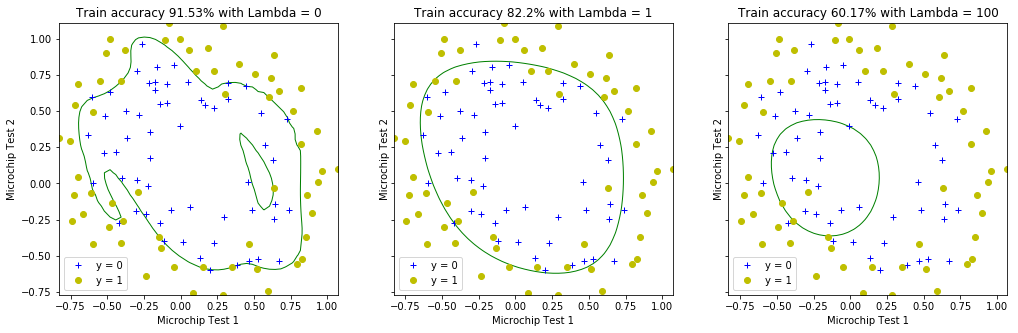

In [41]:
test2_plot(x2_raw, y2_raw, x2_raw_mapped)

Notice that in the above, 
- the plot to the right is overfits because the is no regularization parameter. `lambda = 0`
- the plot to the left over fits because the regularization parameter is too high `lambda = 1`
- the plot to the left is good and this is because of the presence of the reasonable regularization parameter `lambda = 100`

### Predict

**Congratulation** You have successfully trained a regularized classifer

Lets write a predict function that takes in the input features and prdeicts whether the microchip test was passed

In [48]:
def predict2(trained_weight, threshold=0.5):
    input_1 = float(input("Enter Microchip Test 1 Score: "))
    input_2 = float(input("Enter Microchip Test 2 Score: "))
    
    
    X = np.array([[input_1, input_2]])
    X_mapped = mapping.fit_transform(X)
    
    p = sigmoid(X_mapped @ trained_weight.T) >= threshold
    p = p.astype('int')
    print('Probability of pass: ', p[0], "\n")
    
    if (p >= 0.5):
        print("The Microchip has higher chances of passing")
    else:
        print("The Microchip has higher chances of failing")

In [49]:
predict2(res2.x)

Enter Microchip Test 1 Score: 0.05
Enter Microchip Test 2 Score: 0.7
Probability of pass:  1 

The Microchip has higher chances of passing


### PYTHON PRACTICE

Just a reminder. You will find it handy.

`>>>` a=[1,5,9,11,2,66]

`>>>` a[1:]

[5, 9, 11, 2, 66]

`>>>` a[:1]

[1]

`>>>` a[-1:]

[66]

`>>>` a[:-1]

[1, 5, 9, 11, 2]

`>>>` a[3]

11

`>>>` a[3:]

[11, 2, 66]

`>>>` a[:3]

[1, 5, 9]

`>>>` a[-3:]

[11, 2, 66]

`>>>` a[:-3]

[1, 5, 9]

`>>>` a[::1]

[1, 5, 9, 11, 2, 66]

`>>>` a[::-1]

[66, 2, 11, 9, 5, 1]

`>>>` a[1::]

[5, 9, 11, 2, 66]

`>>>` a[::-1]

[66, 2, 11, 9, 5, 1]

`>>>` a[::-2]

[66, 11, 5]

`>>>` a[2::]

[9, 11, 2, 66]